In [1]:
import numpy as np
from torchvision.models.segmentation import fcn_resnet50
import torch
import torch.nn as nn
from unet import UNet
from Fpn import FPN
from histology_dataset import histologyDataset
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader, random_split
from torch import optim
from tqdm import tqdm
from losses import *
import matplotlib.pyplot as plt

In [2]:
dataset = histologyDataset("./histology_dataset/test/images/", "./histology_dataset/test/GT/")
dataset.classes

['AL', 'AS', 'BE', 'BL', 'CT', 'Cartilage', 'PS', 'SM', 'VL']

In [3]:
x = dataset[0]['mask']
np.unique(x.numpy())

KeyError: 'mask'

In [ ]:
# best_model_561.1063777208328.pth -> sm+cartilage
# model_ep99_8.87753176689148.pth -> all classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FPN(in_channels=1, classes=dataset.num_classes)
model.to(device=device)
model.load_state_dict(torch.load("./checkpoints/model_ep99_8.87753176689148.pth", map_location=device))
model.eval()

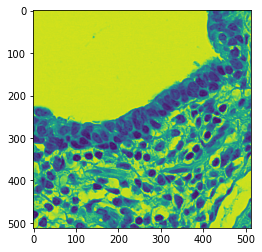

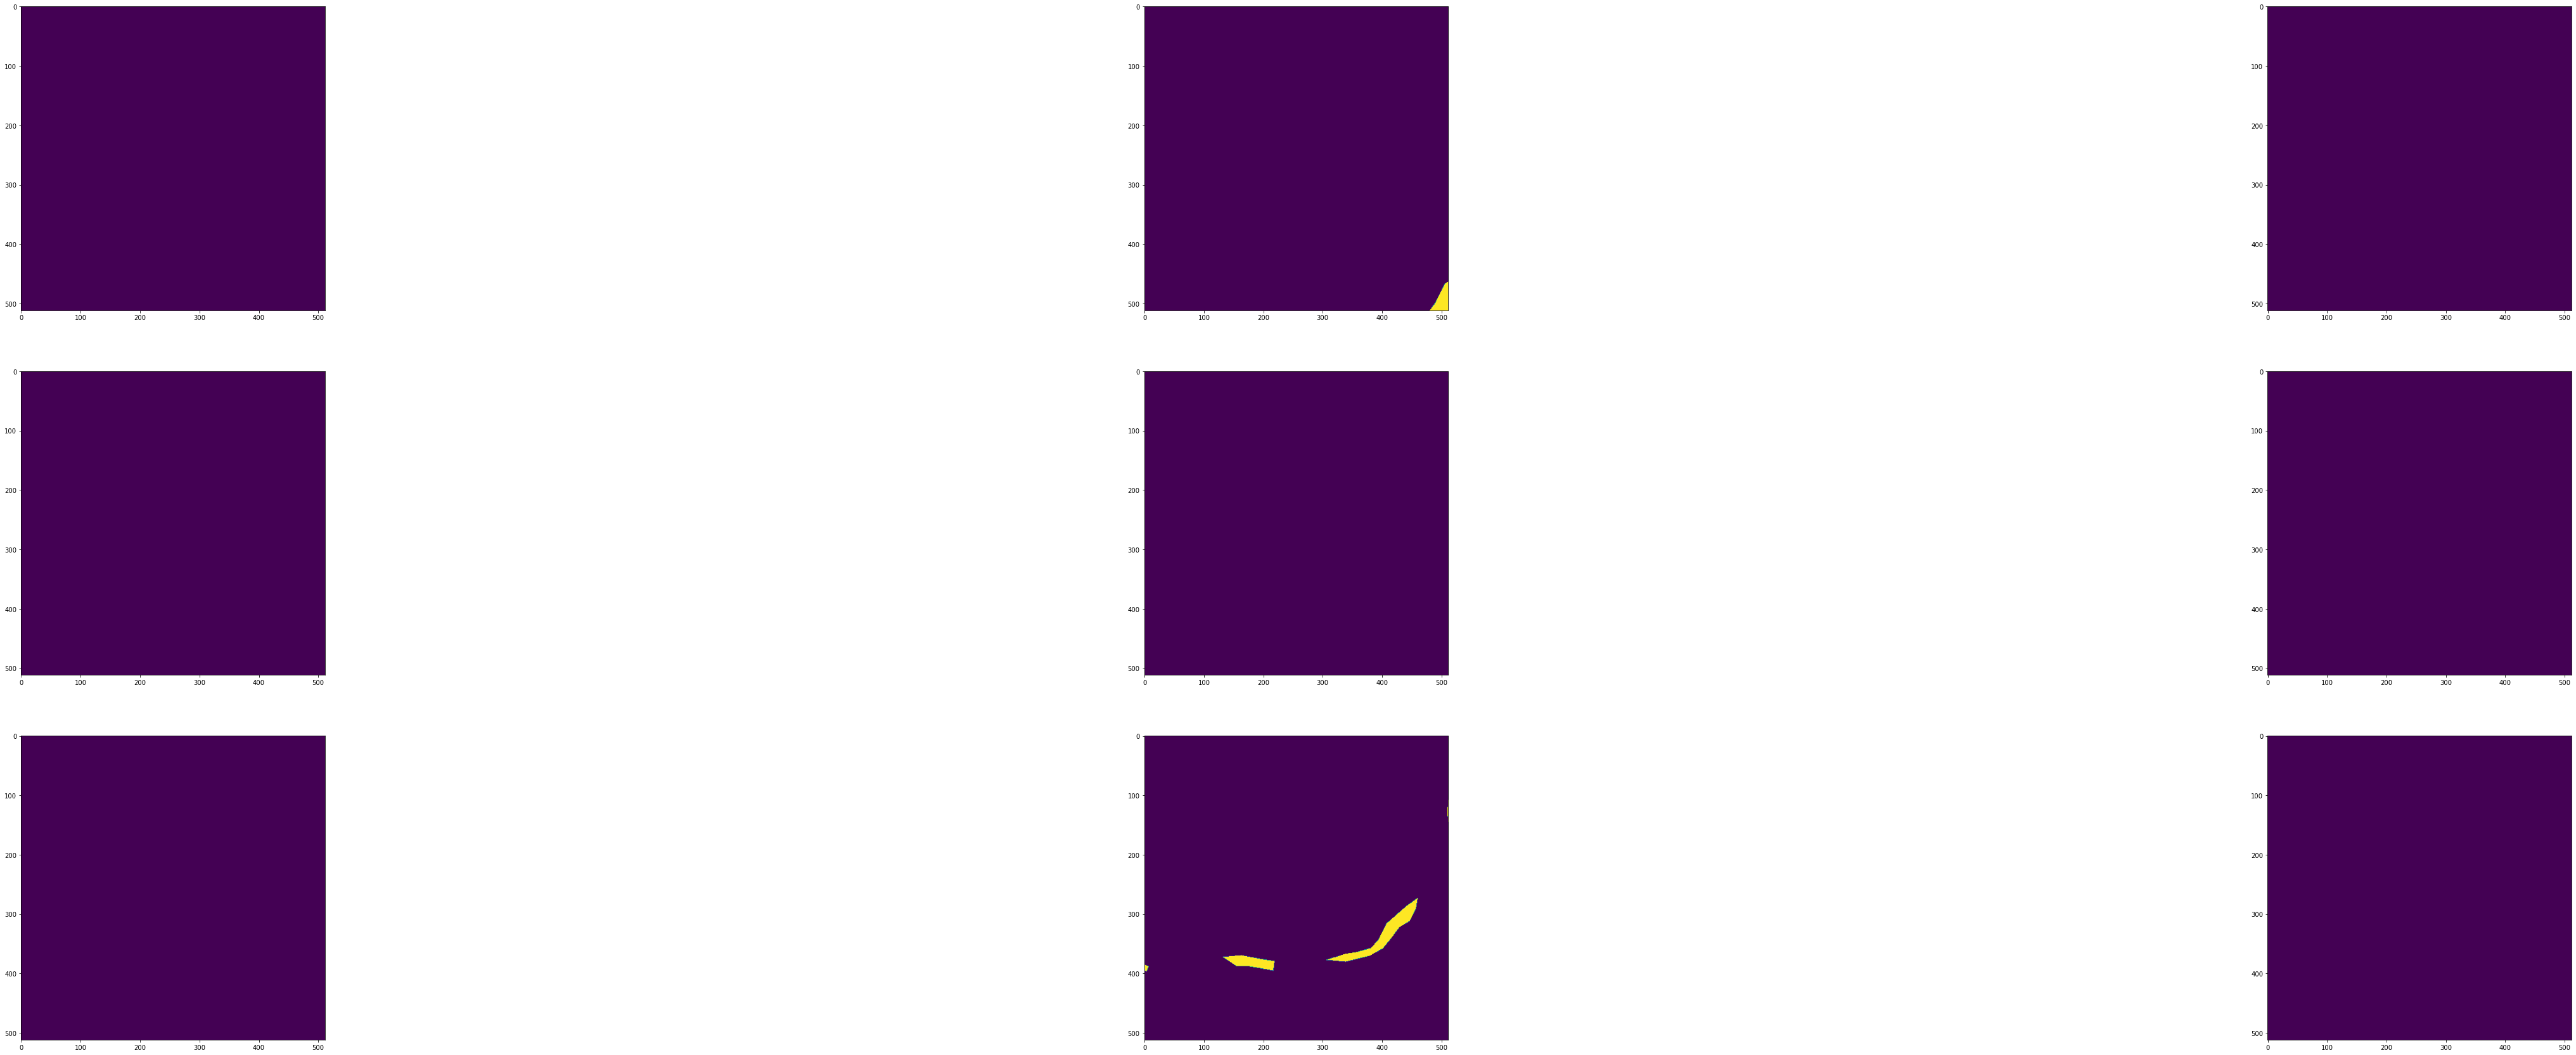

In [4]:
n = 3000
im1 = dataset[n]['image']
masks = dataset[n]['mask']
plt.imshow(im1[0])
fig, axs = plt.subplots(3, 3, figsize=(90,30))
for i in range(masks.shape[0]):
    axs[int(i/3), int(i%3)].imshow(masks[i])

TypeError: unsqueeze(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

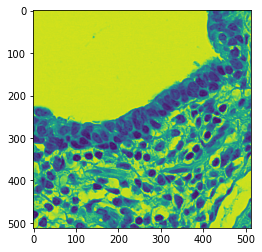

In [5]:
plt.imshow(im1[0])
im1 = torch.unsqueeze(im1, 0).to(device=device)
outs = torch.squeeze(model(im1).cpu().detach()).numpy()
fig1, axs1 = plt.subplots(3, 3, figsize=(90,30))
for i in range(outs.shape[0]):
    axs1[int(i/3), int(i%3)].imshow(outs[i])